In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split

In [26]:
print("Nguyễn Minh Nhật - 6351071052")

Nguyễn Minh Nhật - 6351071052


In [30]:
digits = datasets.load_digits()

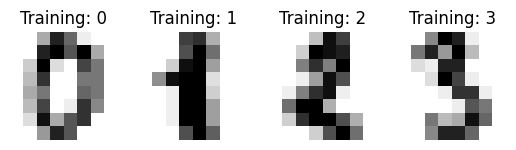

In [41]:
# The data that we are interested in is made of 8x8 images of digits. Let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset. If we were working from image files, we could load them using
# matplotlib.pyplot.imread. Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

plt.show()

In [46]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [47]:
n_samples

1797

In [49]:
# Create a classifier: a decision tree classifier
classifier = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)

In [52]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

In [53]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [54]:
predicted = classifier.predict(X_test)

In [56]:
predicted

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 3, 7, 4, 9, 7,
       7, 3, 5, 9, 0, 0, 2, 2, 7, 1, 2, 0, 9, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 3, 9, 5, 0, 0, 5, 2, 3, 2, 0, 0, 9, 7, 6, 3, 2, 3, 7, 4,
       6, 3, 1, 3, 9, 9, 7, 6, 8, 4, 3, 9, 4, 0, 5, 3, 6, 9, 6, 3, 7, 5,
       4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 1, 0, 8, 0, 8, 0, 4,
       2, 3, 4, 5, 6, 4, 8, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 7, 3, 0, 5,
       6, 7, 6, 9, 8, 7, 5, 5, 6, 5, 0, 9, 2, 5, 8, 0, 1, 7, 7, 2, 5, 1,
       9, 9, 0, 2, 2, 8, 1, 0, 4, 2, 6, 1, 3, 7, 1, 2, 4, 6, 6, 6, 7, 9,
       1, 5, 4, 9, 5, 1, 8, 0, 1, 7, 6, 3, 2, 1, 7, 7, 1, 3, 1, 1, 9, 1,
       2, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 3, 2, 1, 7, 5, 4, 2, 7, 8, 5, 5,
       3, 5, 5, 5, 4, 5, 0, 8, 9, 8, 0, 1, 2, 5, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 8, 4, 5, 6, 7, 8, 9, 0, 1, 2, 5, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5,
       6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 7, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0,
       8, 2, 6, 3, 8, 3, 5, 1, 4, 6, 6, 6, 4, 9, 1,

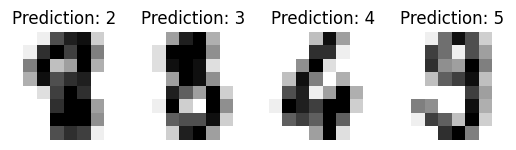

In [57]:
# Biểu diễn một vài kết quả dự đoán
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

plt.show()

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360


Confusion matrix:
[[31  0  0  0  1  0  0  0  1  2]
 [ 0 23  0  2  2  0  0  1  1  7]
 [ 1  2 26  0  0  1  0  3  2  0]
 [ 0  4  2 22  0  4  0  

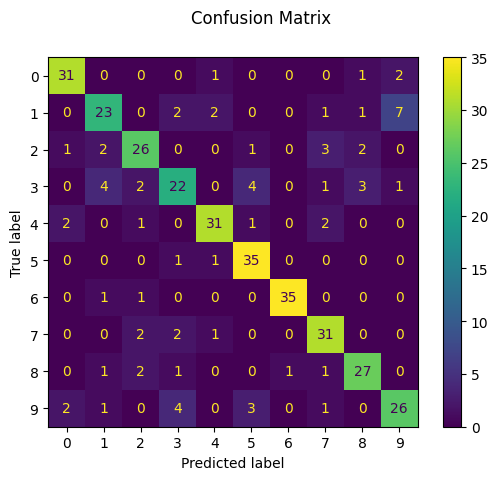

In [59]:
# Thông số đạt được của cây ID3
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [60]:
from PIL import Image, ImageOps
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()   # load lên nó sẽ có cái tên ,lấy bỏ vô cái open()

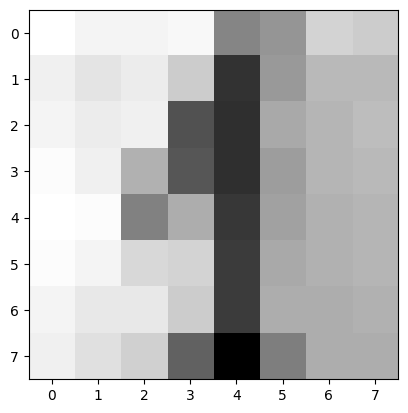

In [69]:
#Open image
img = Image.open('sample1 (1).png').convert("L").resize((8,8))  # sua cau ten giong voi ten SAU (khong ) khi load len
#Invert image
img = ImageOps.invert(img)
#convert to numpy array
im2arr = np.array(img)
#Show
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [71]:
img1d = im2arr.reshape((1, 64))

# Chuẩn hóa nhị phân hóa (Phân ngưỡng)
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0
img1d

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155,
          0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0,   0,   0,
          0, 155, 155,   0,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0,
        155,   0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0]],
      dtype=uint8)

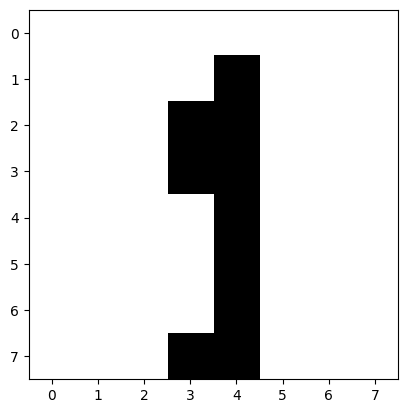

In [72]:
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [73]:
y_pred = classifier.predict(img1d)
print(y_pred)

[1]
